# Installing Necessary Packages and Import

In [76]:
device = "/device:CPU:0"

In [77]:
!pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable


In [78]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


<b>With Intel® Extension for Scikit-learn*, you can accelerate up to 10- 100x, 3 while conforming to scikit-learn APIs. <br>Ref: https://intel.github.io/scikit-learn-intelex/index.html

In [79]:
!pip install onednn-cpu-gomp

Defaulting to user installation because normal site-packages is not writeable


In [80]:
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'
os.environ['DNNL_ENGINE_LIMIT_CPU_CAPABILITIES'] = '0'
os.environ['ONEDNN_VERBOSE'] = '0' #'0' As i dont want to see the logs, set to '1' to see model epoch verbose logs

os.environ['ONEAPI_DEVICE_SELECTOR'] = 'opencl:*'
os.environ['SYCL_ENABLE_DEFAULT_CONTEXTS'] = '1'
os.environ['SYCL_ENABLE_FUSION_CACHING'] = '1'

<b>Enabling oneDNN Optimizations for TensorFlow* running on Intel hardware.<br>
Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/maximize-tensorflow-performance-on-cpu-considerations-and-recommendations-for-inference.html#:~:text=Purpose-,TF_ENABLE_ONEDNN_OPTS,-True

<b>Setting the ONEAPI_DEVICE_SELECTOR using oneAPI DPC++ Framework to use only the OpenCL devices available. Setting SYCL_ENABLE_DEFAULT_CONTEXTS = 1 which will enable creation of default platform contexts in SYCL runtime.
Setting SYCL_ENABLE_FUSION_CACHING = 1 which will enable caching of JIT compilations for kernel fusion. <br>
All the above environment variables are set for optimal performance and memory utilization.<br>
Ref: https://intel.github.io/llvm-docs/EnvironmentVariables.html#oneapi-device-selector:~:text=Controlling%20DPC%2B%2B%20runtime

In [81]:
!pip install tensorflow==2.13.0

Defaulting to user installation because normal site-packages is not writeable


In [82]:
!pip install mkl

Defaulting to user installation because normal site-packages is not writeable


In [83]:
!pip install --upgrade intel-extension-for-tensorflow[cpu]

Defaulting to user installation because normal site-packages is not writeable


<b>Intel® Extension for TensorFlow* aims to bring Intel CPU or GPU devices into TensorFlow open source community for AI workload acceleration. <br>Ref: https://github.com/intel/intel-extension-for-tensorflow#install-for-cpu:~:text=installation%20for%20details.-,Install%20for%20CPU,-pip%20install%20%2D%2Dupgrade

In [84]:
!python -c "import intel_extension_for_tensorflow as itex; print(itex.__version__)"

2023-08-11 04:25:06.869075: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-11 04:25:06.876752: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 04:25:06.925336: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 04:25:06.925795: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 04:25:21.782294: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find

<b>The above message "Intel Extension for Tensorflow* AVX512 CPU backend is loaded." means we are using Intel Tensorflow Operator Optimization (CPU).<br>Ref:
https://intel.github.io/intel-extension-for-tensorflow/latest/docs/guide/features.html

In [85]:
import intel_extension_for_tensorflow as itex

In [86]:
os.environ['ITEX_XPU_BACKEND'] = 'CPU'

<b>Setting the Specific Backend Type as CPU to use the Intel Tensorflow Operator Optimization.
https://www.intel.com/content/www/us/en/developer/articles/technical/optimization-for-tensorflow-and-itex-cheat-sheet.html

In [87]:
os.environ['ITEX_AUTO_MIXED_PRECISION'] = '1'

<b>Enabling Advanced Automatic Mixed Precision: A Basic Configuration for Improved Inference Speed with Reduced Memory Consumption. <br> Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/optimization-for-tensorflow-and-itex-cheat-sheet.html#:~:text=export%20ITEX_AUTO_MIXED_PRECISION%3D1%C2%A0%0Aexport%20ITEX_AUTO_MIXED_PRECISION_DATA_TYPE%3D%22BFLOAT16%22%20%23%20or%20%22FLOAT16%22

# Imports

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
import time
from PIL import Image
from random import randint

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG # Data augmentation için
from tensorflow.keras.preprocessing import image

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report # Confusion matrisi için
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score


print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.13.0


# Data Preprocessing

In [89]:
levels =  ["Non_Demented", "Very_Mild_Demented", "Mild_Demented", "Moderate_Demented"]
path = "Dataset"
data_dir = os.path.join(path)
data = []
for id, level in enumerate(levels):
    for file in os.listdir(os.path.join(data_dir, level)):
        data.append(['{}/{}'.format(level, file), level])

data = pd.DataFrame(data, columns = ['image_file', 'AD_result'])

data['path'] = path + '/' + data['image_file']
data['AD_result'] = data['AD_result'].map({'Non_Demented':'Non Demented', 'Very_Mild_Demented':'Very Mild Demented', 
                                           'Mild_Demented':'Mild Demented', 'Moderate_Demented':'Moderate Demented'})
samples = 6400

data.head()

,image_file,AD_result,path
0,Non_Demented/non_1875.jpg,Non Demented,Dataset/Non_Demented/non_1875.jpg
1,Non_Demented/non_3191.jpg,Non Demented,Dataset/Non_Demented/non_3191.jpg
2,Non_Demented/non_2479.jpg,Non Demented,Dataset/Non_Demented/non_2479.jpg
3,Non_Demented/non_768.jpg,Non Demented,Dataset/Non_Demented/non_768.jpg
4,Non_Demented/non_2173.jpg,Non Demented,Dataset/Non_Demented/non_2173.jpg


In [90]:
print('Number of Repeated Samples: %d'%(data.duplicated().sum()))
print('Total Number of Samples: %d'%(data.isnull().value_counts()))

Number of Repeated Samples: 0
Total Number of Samples: 6400


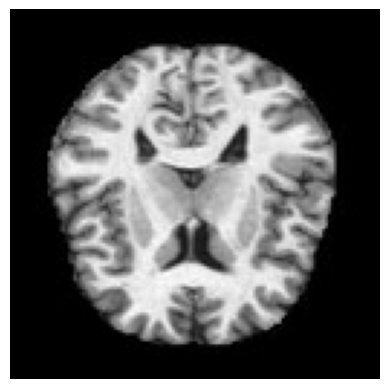

In [91]:
plt.figure()
img = cv2.imread(data['path'][0])
plt.imshow(img)
plt.axis('off')
plt.show() 

The image under review is an MR image but has 3 channels, so this image is in RGB scale. In short, the image we are examining is in RGB scale, even if it is an X-Ray image.

In [92]:
os.environ['TF_ONEDNN_USE_SYSTEM_ALLOCATOR'] = '0'

<b>Use system allocator or BFC allocator in MklCPUAllocator. In general, we set this flag to True for inference, and set this flag to False for training. So, since we are going to train our model now, we set it to False. <br>Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/maximize-tensorflow-performance-on-cpu-considerations-and-recommendations-for-inference.html

# Data Preparation

In [93]:
data_src="Dataset/"

In [94]:
data=[]
labels=[]

for d in os.listdir(data_src):
    for file in os.listdir(data_src+d):
        data.append(Image.open(data_src+d+'/'+file))
        labels.append(d)

In [95]:
# Convert each image into a numpy array
images=[]
for im in data:
    images.append(np.array(im))

#Convert the list of data into an array
images=np.array(images)

images.shape

(6400, 128, 128)

In [96]:
#Divide by 255 to standardize the values between 0 and 1
images=images/255

In [97]:
#Let's count how many of each category we have
non_demented = 0
mild_demented = 0
moderate_demented = 0
very_mild_demented = 0
for i in labels:
    if i=="Mild_Demented":
        mild_demented +=1
    elif i=="Moderate_Demented":
        moderate_demented +=1
    elif i=="Non_Demented":
        non_demented +=1
    else:
        very_mild_demented +=1
print("Non Demented: ", non_demented)
print("Very Mild: ",very_mild_demented)
print("Moderate: ",moderate_demented)
print("Mild :",mild_demented)

Non Demented:  3200
Very Mild:  2240
Moderate:  64
Mild : 896


In [98]:
#Now we change these values to numerical ones so that we can use to_categorical
#0 will be non, 1 will be very mild, 2 will be mild, 3 will be moderate
labels_num=[]

for i in labels:
    if i=="Mild_Demented":
        labels_num.append(2)
    elif i=="Moderate_Demented":
        labels_num.append(3)
    elif i=="Non_Demented":
        labels_num.append(0)
    else:
        labels_num.append(1)

#convert to a categorical target as expected by keras
labels=to_categorical(labels_num)  

labels.shape

(6400, 4)

In [99]:
#Reshape images to use in a neural network
images=images.reshape(6400,128,128,1)

In [100]:
#Split into a training set and test set
train_data, test_data, train_label, test_label = train_test_split(images,labels,test_size=0.25,random_state=42)

2023-08-11 04:26:18,946 - root - INFO - sklearn.model_selection.train_test_split: fallback to original Scikit-learn
2023-08-11 04:26:19,238 - root - INFO - sklearn.model_selection.train_test_split: running accelerated version on CPU


<b>Optimizing train_test_split using scikit-learn-intelex.<br>
Ref:https://intel.github.io/scikit-learn-intelex/algorithms.html

In [101]:
print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(4800, 128, 128, 1) (1600, 128, 128, 1) (4800, 4) (1600, 4)


In [102]:
train_data.shape[1:]

(128, 128, 1)

# Creating and Training the Model

In [103]:
#Create the model
cnn = Sequential()
cnn.add(Conv2D(64,(3,3),
                padding="same",
                activation='relu',
                input_shape=train_data.shape[1:]))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(64,(3,3),
               padding="same",
               activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(32,(2,2),
               padding="same",
               activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Flatten())
cnn.add(Dense(100,activation='relu'))
cnn.add(Dense(4,activation='softmax'))

In [104]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)       

In [105]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [106]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)

In [107]:
#Train the Convolutional Neural Network on the data
start_time = time.time()
history=cnn.fit(train_data, train_label, 
                epochs=20,
                validation_data=(test_data,test_label))
end_time = time.time()

Epoch 1/20


2023-08-11 04:31:27.711870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:31:27.716242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:31:27.720820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:31:28.320890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:31:28.378372: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:118] Run advanced auto mixed precision datatype BFLOAT16 on CPU
2023-08-11 04:31:28.462555: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:1742] Converted 74/397 nodes to bfloat16 precision using 2 cast(s) to bfloat16 (excluding Const and Variable casts)
2023-08-11 04:31:2

150/150 [==============================] - ETA: 0s - loss: 1.0390 - accuracy: 0.4938

2023-08-11 04:31:59.891772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:31:59.896911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:31:59.902536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:31:59.966028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:31:59.978863: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:118] Run advanced auto mixed precision datatype BFLOAT16 on CPU
2023-08-11 04:31:59.989005: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:1742] Converted 11/71 nodes to bfloat16 precision using 1 cast(s) to bfloat16 (excluding Const and Variable casts)
2023-08-11 04:32:00

150/150 [==============================] - 36s 232ms/step - loss: 1.0390 - accuracy: 0.4938 - val_loss: 1.0201 - val_accuracy: 0.4831
Epoch 2/20
150/150 [==============================] - ETA: 0s - loss: 0.9319 - accuracy: 0.5467

2023-08-11 04:32:34.575056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:32:34.582429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:32:34.588215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 35s 231ms/step - loss: 0.9319 - accuracy: 0.5467 - val_loss: 0.8997 - val_accuracy: 0.5994
Epoch 3/20
150/150 [==============================] - ETA: 0s - loss: 0.7999 - accuracy: 0.6385

2023-08-11 04:33:09.112853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:33:09.118208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:33:09.123963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 35s 230ms/step - loss: 0.7999 - accuracy: 0.6385 - val_loss: 0.7308 - val_accuracy: 0.6744
Epoch 4/20
150/150 [==============================] - ETA: 0s - loss: 0.6333 - accuracy: 0.7221

2023-08-11 04:33:43.522787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:33:43.528157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:33:43.533900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 34s 230ms/step - loss: 0.6333 - accuracy: 0.7221 - val_loss: 0.5724 - val_accuracy: 0.7594
Epoch 5/20
150/150 [==============================] - ETA: 0s - loss: 0.4096 - accuracy: 0.8269

2023-08-11 04:34:17.942614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:34:17.947987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:34:17.953684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 34s 229ms/step - loss: 0.4096 - accuracy: 0.8269 - val_loss: 0.5630 - val_accuracy: 0.7325
Epoch 6/20
150/150 [==============================] - ETA: 0s - loss: 0.2727 - accuracy: 0.8923

2023-08-11 04:34:52.719283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:34:52.724746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:34:52.730500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 35s 232ms/step - loss: 0.2727 - accuracy: 0.8923 - val_loss: 0.3120 - val_accuracy: 0.8744
Epoch 7/20
150/150 [==============================] - ETA: 0s - loss: 0.1489 - accuracy: 0.9433

2023-08-11 04:35:27.277238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:35:27.282791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:35:27.288593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 35s 230ms/step - loss: 0.1489 - accuracy: 0.9433 - val_loss: 0.2901 - val_accuracy: 0.8781
Epoch 8/20
150/150 [==============================] - ETA: 0s - loss: 0.0807 - accuracy: 0.9727

2023-08-11 04:36:01.768182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:36:01.773317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:36:01.779082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 34s 230ms/step - loss: 0.0807 - accuracy: 0.9727 - val_loss: 0.2137 - val_accuracy: 0.9231
Epoch 9/20
150/150 [==============================] - ETA: 0s - loss: 0.0450 - accuracy: 0.9894

2023-08-11 04:36:36.244645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:36:36.249966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:36:36.255685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 34s 230ms/step - loss: 0.0450 - accuracy: 0.9894 - val_loss: 0.1280 - val_accuracy: 0.9525
Epoch 10/20
150/150 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9927

2023-08-11 04:37:10.787888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:37:10.793245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:37:10.799007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 35s 230ms/step - loss: 0.0273 - accuracy: 0.9927 - val_loss: 0.1007 - val_accuracy: 0.9706
Epoch 11/20
150/150 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 0.9979

2023-08-11 04:37:45.295589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:37:45.301445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:37:45.307372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 35s 230ms/step - loss: 0.0100 - accuracy: 0.9979 - val_loss: 0.0959 - val_accuracy: 0.9681
Epoch 12/20
150/150 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000

2023-08-11 04:38:20.038286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:38:20.043481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:38:20.049177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 35s 232ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0921 - val_accuracy: 0.9737
Epoch 13/20
150/150 [==============================] - ETA: 0s - loss: 9.9810e-04 - accuracy: 1.0000

2023-08-11 04:38:58.141545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:38:58.147175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:38:58.153181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 38s 255ms/step - loss: 9.9810e-04 - accuracy: 1.0000 - val_loss: 0.0924 - val_accuracy: 0.9756
Epoch 14/20
150/150 [==============================] - ETA: 0s - loss: 6.6738e-04 - accuracy: 1.0000

2023-08-11 04:39:32.714214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:39:32.719275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:39:32.724989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 34s 230ms/step - loss: 6.6738e-04 - accuracy: 1.0000 - val_loss: 0.0943 - val_accuracy: 0.9762
Epoch 15/20
150/150 [==============================] - ETA: 0s - loss: 5.2251e-04 - accuracy: 1.0000

2023-08-11 04:40:07.086328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:40:07.091842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:40:07.097755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 34s 229ms/step - loss: 5.2251e-04 - accuracy: 1.0000 - val_loss: 0.0959 - val_accuracy: 0.9737
Epoch 16/20
150/150 [==============================] - ETA: 0s - loss: 4.0316e-04 - accuracy: 1.0000

2023-08-11 04:40:41.483977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:40:41.489263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:40:41.495026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 34s 230ms/step - loss: 4.0316e-04 - accuracy: 1.0000 - val_loss: 0.0939 - val_accuracy: 0.9750
Epoch 17/20
150/150 [==============================] - ETA: 0s - loss: 3.2956e-04 - accuracy: 1.0000

2023-08-11 04:41:15.881748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:41:15.886842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:41:15.892584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 34s 229ms/step - loss: 3.2956e-04 - accuracy: 1.0000 - val_loss: 0.0947 - val_accuracy: 0.9781
Epoch 18/20
150/150 [==============================] - ETA: 0s - loss: 2.7252e-04 - accuracy: 1.0000

2023-08-11 04:41:50.084943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:41:50.090685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:41:50.096537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 34s 228ms/step - loss: 2.7252e-04 - accuracy: 1.0000 - val_loss: 0.0951 - val_accuracy: 0.9775
Epoch 19/20
150/150 [==============================] - ETA: 0s - loss: 2.3508e-04 - accuracy: 1.0000

2023-08-11 04:42:24.571028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:42:24.576364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:42:24.582103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 35s 230ms/step - loss: 2.3508e-04 - accuracy: 1.0000 - val_loss: 0.0969 - val_accuracy: 0.9762
Epoch 20/20
150/150 [==============================] - ETA: 0s - loss: 1.9986e-04 - accuracy: 1.0000

2023-08-11 04:42:58.950761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:42:58.956057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 04:42:58.961774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 34s 230ms/step - loss: 1.9986e-04 - accuracy: 1.0000 - val_loss: 0.0975 - val_accuracy: 0.9800


In [108]:
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")
print(f"Execution time: {execution_time/60} minutes")

Execution time: 695.4213471412659 seconds
Execution time: 11.590355785687764 minutes


<b> As you can see, with Intel Optimizations, the time taken for training such a large dataset took only 695.42 seconds (11.59 mins) and the accuracy is a bit higher than without oneAPI.

# Model Evaluation


In [33]:
os.environ['TF_ONEDNN_USE_SYSTEM_ALLOCATOR'] = '1'

<b>Use system allocator or BFC allocator in MklCPUAllocator. In general, we set this flag to True for inference, and set this flag to False for training. So, since we are goin to test our model now we set it to true.<br>
Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/maximize-tensorflow-performance-on-cpu-considerations-and-recommendations-for-inference.html

In [34]:
import os

os.environ['TF_ONEDNN_ASSUME_FROZEN_WEIGHTS'] = '1'

<b>Frozen weights for inference.
Better inference performance is achieved with frozen graphs.<br> Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/maximize-tensorflow-performance-on-cpu-considerations-and-recommendations-for-inference.html#:~:text=Frozen%20weights%20for%20inference.%0ABetter%20inference%20performance%20is%20achieved%20with%20frozen%20graphs.

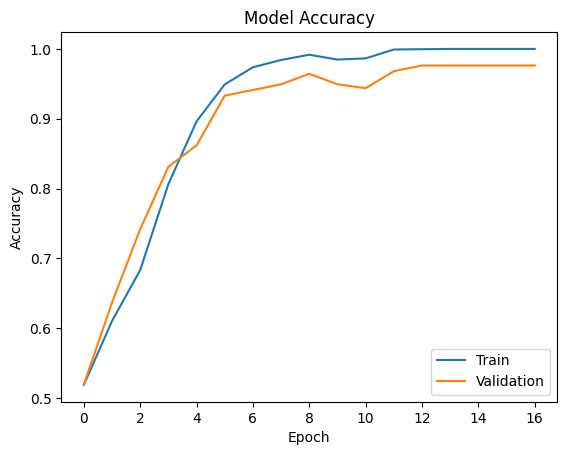

In [35]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

In [36]:
#Get a prediction from the neural network
y_pred=cnn.predict(test_data)

2023-08-11 01:32:27.482014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:32:27.485808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:32:27.490162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


 2/50 [>.............................] - ETA: 3s 

2023-08-11 01:32:27.736734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:32:27.744279: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:118] Run advanced auto mixed precision datatype BFLOAT16 on CPU
2023-08-11 01:32:27.760822: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:1742] Converted 11/38 nodes to bfloat16 precision using 1 cast(s) to bfloat16 (excluding Const and Variable casts)
2023-08-11 01:32:27.768760: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:118] Run advanced auto mixed precision datatype BFLOAT16 on CPU
2023-08-11 01:32:27.772591: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:1742] Converted 0/49 nodes to bfloat16 precision using 0 cast(s) to bfloat16 (excluding Const and Variable casts)


50/50 [==============================] - 4s 73ms/step


In [37]:
#The prediction is a sequence of 4 probabilities. We choose the label with the highest probability.
y_val=[]
for y in y_pred:
    y_val.append(np.argmax(y))

In [38]:
#Convert back to labels 0-3
y_true=[]
for y in test_label:
    y_true.append(np.argmax(y))

In [98]:
#Let's see how the predictions did
print(confusion_matrix(y_true,y_val))

[[765   8   0   0]
 [ 23 561   2   0]
 [  4  10 206   0]
 [  0   0   0  21]]


In [99]:
cm = confusion_matrix(y_true,y_val)

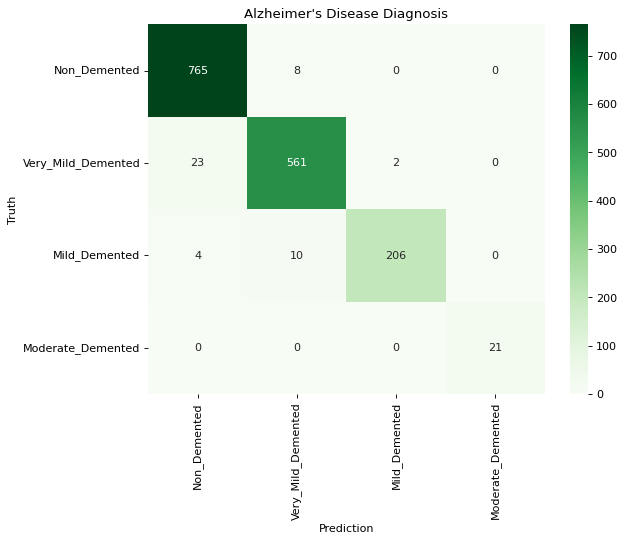

In [100]:
Labels = ["Non_Demented", "Very_Mild_Demented", "Mild_Demented", "Moderate_Demented"]

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(cm, cmap='Greens', annot=True, fmt='d', xticklabels=Labels, yticklabels=Labels)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [101]:
print("Classification Report")
print(classification_report(y_true,y_val))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       773
           1       0.97      0.96      0.96       586
           2       0.99      0.94      0.96       220
           3       1.00      1.00      1.00        21

    accuracy                           0.97      1600
   macro avg       0.98      0.97      0.98      1600
weighted avg       0.97      0.97      0.97      1600



In [102]:
print("Accuracy on test data: ",accuracy_score(y_true,y_val))

Accuracy on test data:  0.970625


# Testing the Model

In [103]:

submission = pd.DataFrame(list(zip(y_val, y_true)))
submission.columns =['Predictions', 'Actual']
submission.to_csv("submission.csv", index=False)

In [104]:

def show_image(img_path):
  img = mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  return plt.show()

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]) 

In [138]:
from tensorflow.keras.preprocessing import image
Labels = ['Non_Demented', 'Very_Mild_Demented', 'Mild_Demented', 'Moderate_Demented']

def predict_label(img_path):
    test_image = Image.open(img_path).convert('L')
    test_image = image.img_to_array(test_image)/255.0
    test_image = test_image.reshape(-1,128,128,1)
    predict_x= cnn.predict(test_image) 
    classes_x=np.argmax(predict_x,axis=1)
    return show_image(img_path), Labels[classes_x[0]]

1/1 [==============================] - 0s 22ms/step


2023-08-10 06:46:26.181389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-10 06:46:26.185586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-10 06:46:26.191351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


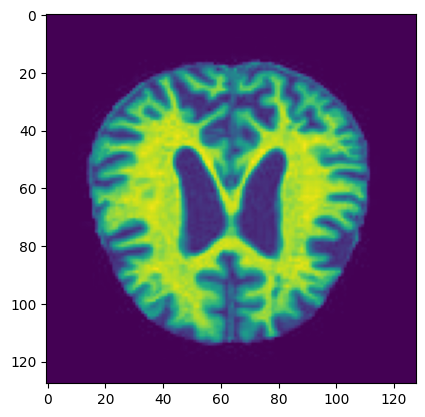

(None, 'Moderate_Demented')

In [140]:
predict_label('Dataset/Moderate_Demented/moderate_11.jpg')

# Saving the Model

In [135]:
#Saving the model for future use
work_dir = "Dataset/"
model_dir = work_dir + "alzheimer_cnn_model"
cnn.save(model_dir, save_format='h5')
os.listdir(work_dir)

/home/u197984/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['Very_Mild_Demented',
 'alzheimer_cnn_model',
 'Mild_Demented',
 'Moderate_Demented',
 'Non_Demented']